In [1]:
#One-way ANOVA: Compares the means of one continuous dependent variable based on three or more groups of one categorical variable.
#Two-way ANOVA: Compares the means of one continuous dependent variable based on three or more groups of two categorical variables.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df=sns.load_dataset('diamonds',cache=False)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [37]:
### data cleaning*********
# Check how many diamonds are each color grade
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [38]:
#colorless = df[df["color"].isin(["E","F","H","D","I"])]

# Select only color and price columns, and reset index
#colorless = colorless[["color","price"]].reset_index(drop=True)
colorless = df[df["color"].isin(["E", "F", "H", "D", "I"])][["color", "price"]].reset_index(drop=True)
colorless

,color,price
0,E,326
1,E,326
2,E,327
3,I,334
4,I,336
...,...,...
39835,D,2757
39836,D,2757
39837,D,2757
39838,H,2757


In [39]:
# Remove dropped categories of diamond color

#colorless["color"] = colorless["color"].cat.remove_categories(["G", "J"])
colorless['color'] =colorless['color'].cat.remove_categories(['G','J'])

colorless["color"].values

['E', 'E', 'E', 'I', 'I', ..., 'D', 'D', 'D', 'H', 'D']
Length: 39840
Categories (5, object): ['D', 'E', 'F', 'H', 'I']

In [40]:
# Import math package
import math

# Take the logarithm of the price, and insert it as the third column
colorless.insert(2, "log_price", [math.log(price) for price in colorless["price"]])
#colorless.insert(2,'log_price',[math.log(price) for price in colorless['price']])
print(colorless)

      color  price  log_price
0         E    326   5.786897
1         E    326   5.786897
2         E    327   5.789960
3         I    334   5.811141
4         I    336   5.817111
...     ...    ...        ...
39835     D   2757   7.921898
39836     D   2757   7.921898
39837     D   2757   7.921898
39838     H   2757   7.921898
39839     D   2757   7.921898

[39840 rows x 3 columns]


In [41]:
colorless.dropna(inplace=True)
colorless.reset_index(inplace=True,drop=True)

In [42]:
colorless.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


In [43]:
colorless.to_csv('dfs',index=False,header=list(colorless.columns))

In [44]:
# one way ANOVA
df=pd.read_csv('dfs')
df.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


<AxesSubplot:xlabel='color', ylabel='log_price'>

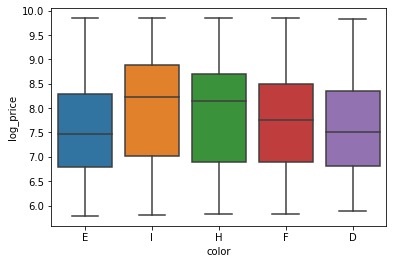

In [11]:
sns.boxplot(x='color',y='log_price',data=df)

In [12]:
#In order to run ANOVA, we need to create a regression model. 
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [13]:
model=ols(formula='log_price ~ C(color)',data=df).fit()
model

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Mon, 04 Mar 2024   Prob (F-statistic):          3.61e-225
Time:                        19:28:42   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Run one-way ANOVA
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


In [16]:
sm.stats.anova_lm(model,typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,1041.690290,260.422572,264.987395,3.609774e-225
Residual,39835.0,39148.779822,0.982773,NaN,NaN


In [17]:
sm.stats.anova_lm(model,typ=3)

,sum_sq,df,F,PR(>F)
Intercept,393066.804852,1.0,399956.684283,0.000000e+00
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


In [18]:
df=sns.load_dataset('diamonds',cache=False)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [19]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [20]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [21]:

import math
df2 = df[['color','cut','price']]
df2 = df2[df2['color'].isin(["E","F","H","D","I"])]
df2.color = df2.color.cat.remove_categories(['G','J'])

df2 = df2[df2['cut'].isin(["Ideal","Premium","Very Good"])]
df2.cut = df2.cut.cat.remove_categories(["Good","Fair"])

df2.dropna(inplace= True)
df2.reset_index(inplace= True, drop= True)
 
df2.insert(3,'log_price',[math.log(price) for price in df2['price']])

In [22]:
df2.head()

,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,I,Premium,334,5.811141
3,I,Very Good,336,5.817111
4,H,Very Good,337,5.820083


In [23]:
df2.to_csv('df2.csv',index=False,header= list(df2.columns))

In [24]:
df2 = pd.read_csv("df2.csv")
df2.head()

,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,I,Premium,334,5.811141
3,I,Very Good,336,5.817111
4,H,Very Good,337,5.820083


In [25]:
model2 = ols(formula= 'log_price ~ C(color)+C(cut)+ C(color):C(cut)', data=df2).fit()
model2

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Mon, 04 Mar 2024   Prob (F-statistic):          3.61e-225
Time:                        19:28:45   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Run two-way ANOVA
sm.stats.anova_lm(model2,typ=2)

,sum_sq,df,F,PR(>F)
C(color),926.361461,4.0,237.014783,3.481145e-201
C(cut),630.641441,2.0,322.706309,1.348511e-139
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


In [28]:
sm.stats.anova_lm(model2,typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,977.195814,244.298954,250.021037,3.747388e-212
C(cut),2.0,630.641441,315.320721,322.706309,1.348511e-139
C(color):C(cut),8.0,27.478611,3.434826,3.515279,4.531734e-04
Residual,34920.0,34120.806577,0.977114,NaN,NaN


In [29]:
sm.stats.anova_lm(model2,typ=3)

,sum_sq,df,F,PR(>F)
Intercept,157578.043681,1.0,161268.910012,0.000000e+00
C(color),319.145817,4.0,81.655250,4.134649e-69
C(cut),100.144107,2.0,51.244864,5.987341e-23
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


In [30]:
#Since all of the p-values (column PR(>F)) are very small, we can reject all three null hypotheses.

In [ ]:
##ANOVA post hoc test 

In [31]:
##One-way ANOVA: Compares the means of one continuous dependent variable based on three or more groups of one categorical variable.
#Post hoc test: Performs a pairwise comparison between all available groups while controlling for the error rate.

In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [45]:
df=pd.read_csv('dfs')
df.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


In [46]:
#One-way ANOVA
#Here we follow the same steps as above:

#Build a simple linear regression model
#Check the results
#Run one-way ANOVA
model=ols(formula='log_price ~ C(color)',data=df).fit()

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Mon, 04 Mar 2024   Prob (F-statistic):          3.61e-225
Time:                        21:10:05   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Run one-way ANOVA
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


In [49]:
#Since the p-value is very small and we can reject the null hypothesis that the mean price is the same for all diamond color grades,
#we can continue on to run a post hoc test. 
#The post hoc test is useful because the one-way ANOVA does not tell us which colors are associated with different prices. 
#The post hoc test will give us more information.

In [52]:
#Post hoc test
#ANOVA post hoc tests is the Tukey's HSD (honestly significantly different) test.
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [53]:
tukey_oneway = pairwise_tukeyhsd(endog=df['log_price'], groups= df['color'], alpha= 0.05)
# The endog parameter is the dependent variable ("log_price" in this case), 
#the groups parameter is the grouping variable ("color" in this case).
#alpha parameter sets the significance level (0.05 is commonly used).

In [54]:
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D,E,-0.0375,0.1169,-0.0802,0.0052,False
D,F,0.1455,0.0,0.1026,0.1885,True
D,H,0.3015,0.0,0.2573,0.3458,True
D,I,0.4061,0.0,0.3568,0.4553,True
E,F,0.183,0.0,0.1441,0.2219,True
E,H,0.339,0.0,0.2987,0.3794,True
E,I,0.4436,0.0,0.3978,0.4893,True
F,H,0.156,0.0,0.1154,0.1966,True
F,I,0.2605,0.0,0.2145,0.3065,True
H,I,0.1045,0.0,0.0573,0.1517,True


In [ ]:
# reject the true it means enough evidance to reject null hypothesis 
#if reject the false it means is not enough evidance to reject null hypothesis


#Test 1: D vs. E
#𝐻0:𝑝𝑟𝑖𝑐𝑒𝐷=𝑝𝑟𝑖𝑐𝑒𝐸 
#The price of D and E color grade diamonds are the same.
#𝐻1:𝑝𝑟𝑖𝑐𝑒𝐷≠𝑝𝑟𝑖𝑐𝑒𝐸
#The price of D and E color grade diamonds are not the same.
#Result: We cannot reject the null hypothesis that the price of D and E color grade diamonds are the same.



#Test 2: D vs. F
#𝐻0:𝑝𝑟𝑖𝑐𝑒𝐷=𝑝𝑟𝑖𝑐𝑒𝐹  
#The price of D and F color grade diamonds are the same.
#𝐻1:𝑝𝑟𝑖𝑐𝑒𝐷≠𝑝𝑟𝑖𝑐𝑒𝐹
#The price of D and F color grade diamonds are not the same.
#Result: We can reject the null hypothesis that the price of D and F color grade diamonds are the same.


#Test 3: D vs. H
#𝐻0:𝑝𝑟𝑖𝑐𝑒𝐷=𝑝𝑟𝑖𝑐𝑒𝐻
#price of D and H color grade diamonds are the same.
#𝐻1:𝑝𝑟𝑖𝑐𝑒𝐷≠𝑝𝑟𝑖𝑐𝑒𝐻 
#price of D and H color grade diamonds are not the same.
#Result: We can reject the null hypothesis that the price of D and H color grade diamonds are the same.


#Now, its seems like doing all group of comparission to grp 1 and grp 2 and check the null hypothesis is reject or not.
# But in here the scenario is same accordingly test 2 and test 3 because the same result of summary observation